In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import seaborn as sb
import glob
import statistics as stats
import warnings
%matplotlib inline

In [2]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
# %matplotlib notebook

In [3]:
# string of path
strPath = "./"
strFile = "USvideos.csv"
df = pd.read_csv(strPath + strFile)

In [4]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
len(df)

40949

In [6]:
#Import the Data From Json File To Get Our Categories  
category_from_json={}
with open("./JSONs/US_category_id.json","r") as file:
    data=json.load(file)
    for category in data["items"]:
        category_from_json[category["id"]]=category["snippet"]["title"] #it Stores the category id with category name

# 
# we transforms categories to list
l_categories = []
for i, v in category_from_json.items(): 
    if v not in l_categories: # without duplicates
        l_categories.append(v)

category_from_json

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [8]:
# list of Categoríes. Some Categories don't have information and 
# many categories are duplicated
l_categories = l_categories
l_categories.sort()
l_categories

['Action/Adventure',
 'Anime/Animation',
 'Autos & Vehicles',
 'Classics',
 'Comedy',
 'Documentary',
 'Drama',
 'Education',
 'Entertainment',
 'Family',
 'Film & Animation',
 'Foreign',
 'Gaming',
 'Horror',
 'Howto & Style',
 'Movies',
 'Music',
 'News & Politics',
 'Nonprofits & Activism',
 'People & Blogs',
 'Pets & Animals',
 'Sci-Fi/Fantasy',
 'Science & Technology',
 'Short Movies',
 'Shorts',
 'Shows',
 'Sports',
 'Thriller',
 'Trailers',
 'Travel & Events',
 'Videoblogging']

In [ ]:
We create a column to store the names of the categories of each video.

In [9]:
#Lets change the data-format of following fields to int type, which will be easy to use.
list1=["views likes dislikes comment_count".split()] 
for column in list1:
    df[column]=df[column].astype(int)
#Similarly Convert The Category_id into String,because later we're going to map it with data extracted from json file    
list2=["category_id"] 
for column in list2:
    df[column]=df[column].astype(str)
df["Category"]=df["category_id"].map(category_from_json) #category_from_json{} stores categories from JSON files   

In [10]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


In [70]:
def get_relation1(list, title):
    plt.style.use('ggplot')
    ax = list.plot.bar(stacked=True, figsize=(12,8))
    totalLikes=0
    totalDiskl=0
    
    for i, bar in enumerate(ax.patches):
        if i==16: break
        totalLikes += list['likes'][i]
        totalDiskl += list['dislikes'][i]
    
    for i, bar in enumerate(ax.patches):
        if (i==16): break # without index.
        percentageL = round(list['likes'][i]*100/totalLikes,2)
        percentageD = round(list['dislikes'][i]*100/totalDiskl,2)
        vl = f"{list['likes'][i]} ({percentageL}%) / {list['dislikes'][i]} ({percentageD}%)"
        if (i==7):
            ht = -bar.get_height() / 1.75
            bar.set_color('#ffff88')
        else:
            ht = bar.get_height() / 4.5
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + ht , vl, 
                    horizontalalignment= 'center', verticalalignment='bottom', fontsize=10, rotation = 90, color='black')
        #print(bar.get_height())
        
    plt.yticks(rotation=30, fontsize=15) 
    plt.xticks(rotation=90, fontsize=15) 
    plt.title(title, fontsize=25)
    plt.legend(handlelength=4, fontsize  = 20)
    plt.show()

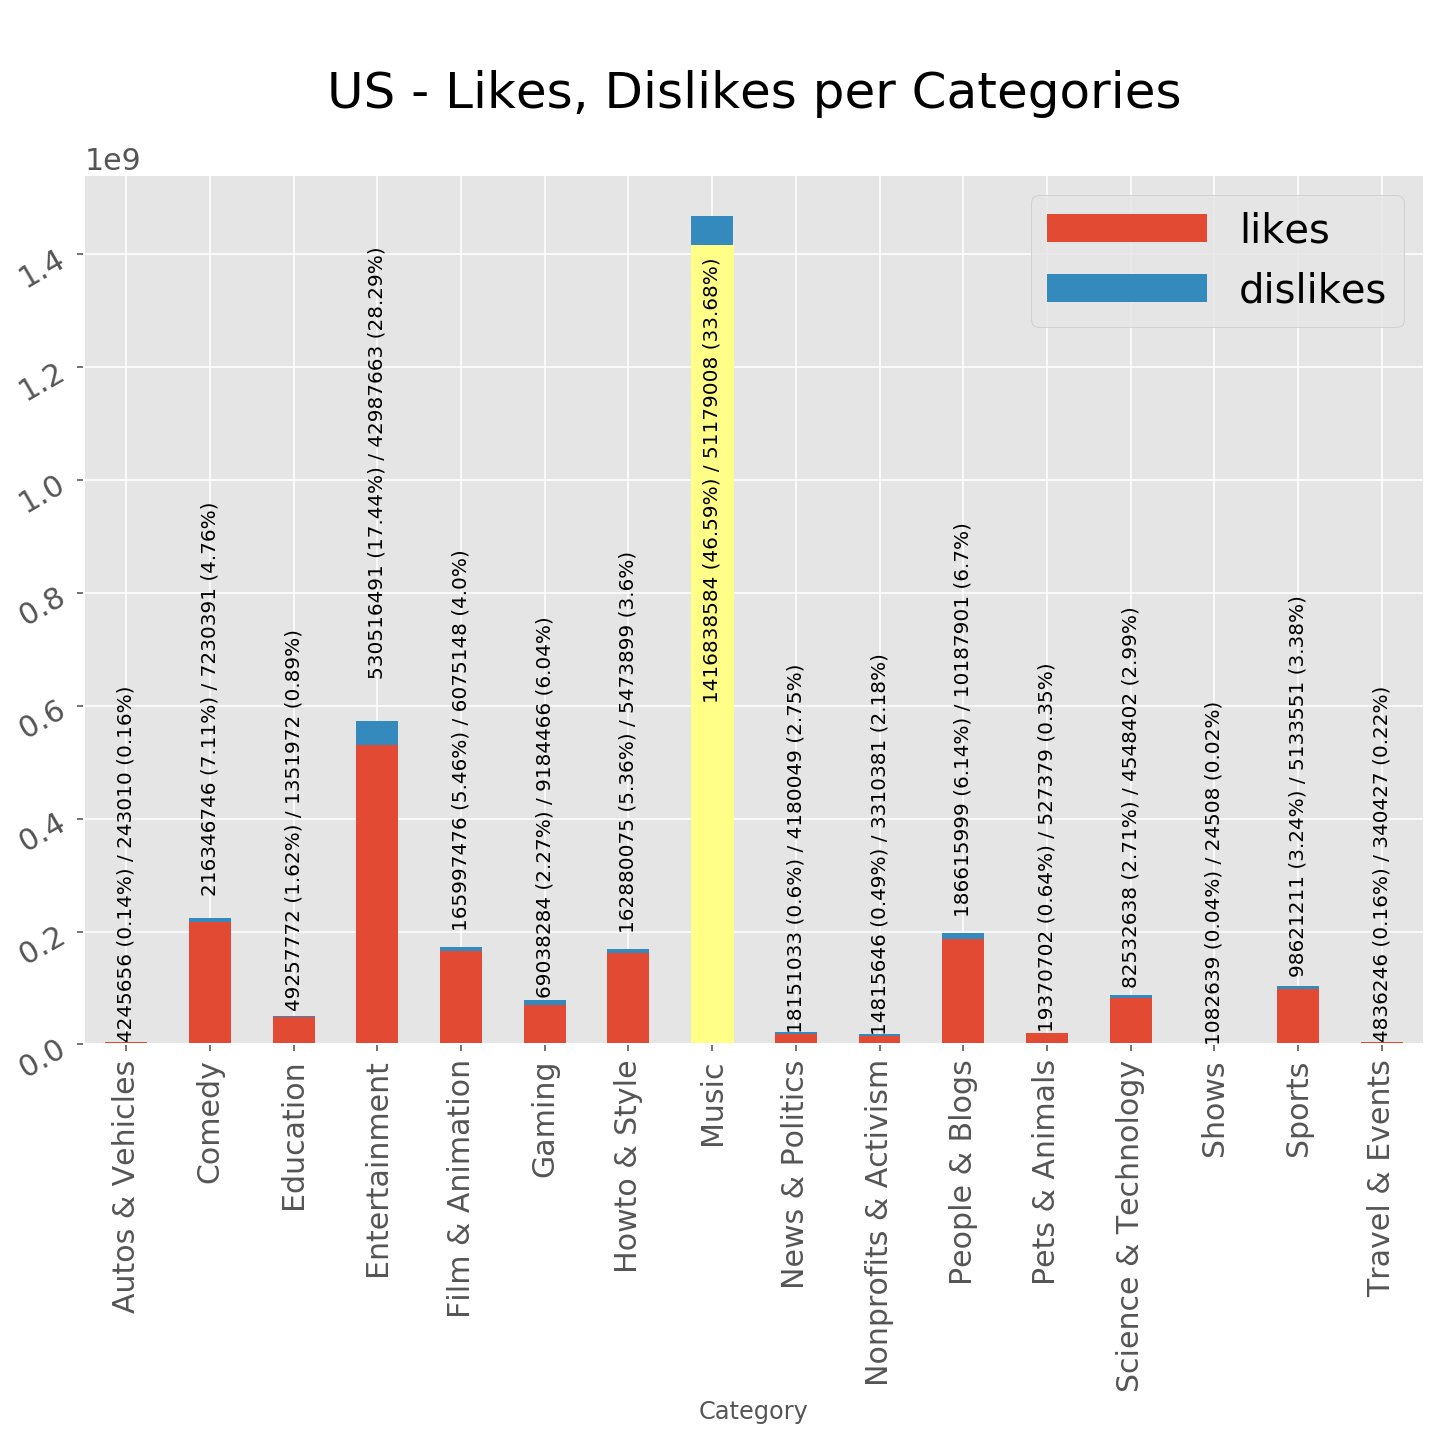

In [71]:
list = df[["Category","likes", "dislikes"]].groupby("Category").sum()
#list = df.groupby("Category").sum()
title = "\nUS - Likes, Dislikes per Categories\n"
get_relation1(list, title)

In [24]:
def get_relation2(list, title):
    ax = list.plot.bar(stacked=True, figsize=(12,8), color = 'r')
    #ax[0].set_color('r')
    totalViews=0
    for i, bar in enumerate(ax.patches):
        if i==16: break
        totalViews += list['views'][i]
    for i, bar in enumerate(ax.patches):
        if (i==16): break # without index.
        percentageV = round(list['views'][i]*100/totalViews,2)
        vl = f"{list['views'][i]} ({percentageV}%)"
        if (i==7):
            ht = -bar.get_height() / 2.8
            bar.set_color('#A0C0ff')
        else:
            ht = bar.get_height() / 10
            
        
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + ht , vl, 
                    horizontalalignment= 'center', verticalalignment='bottom', fontsize=12, rotation = 90, color='black')
        
    plt.yticks(rotation=30, fontsize=15) 
    plt.xticks(rotation=90, fontsize=15) 
    plt.title(title, fontsize=25)
    plt.legend(handlelength=4, fontsize  = 20)
    plt.show()

In [25]:
list = df[["Category","views"]].groupby("Category").sum()
list

,views
Category,
Autos & Vehicles,520690717
Comedy,5117426208
Education,1180629990
Entertainment,20604388195
Film & Animation,7284156721
Gaming,2141218625
Howto & Style,4078545064
Music,40132892190
News & Politics,1473765704


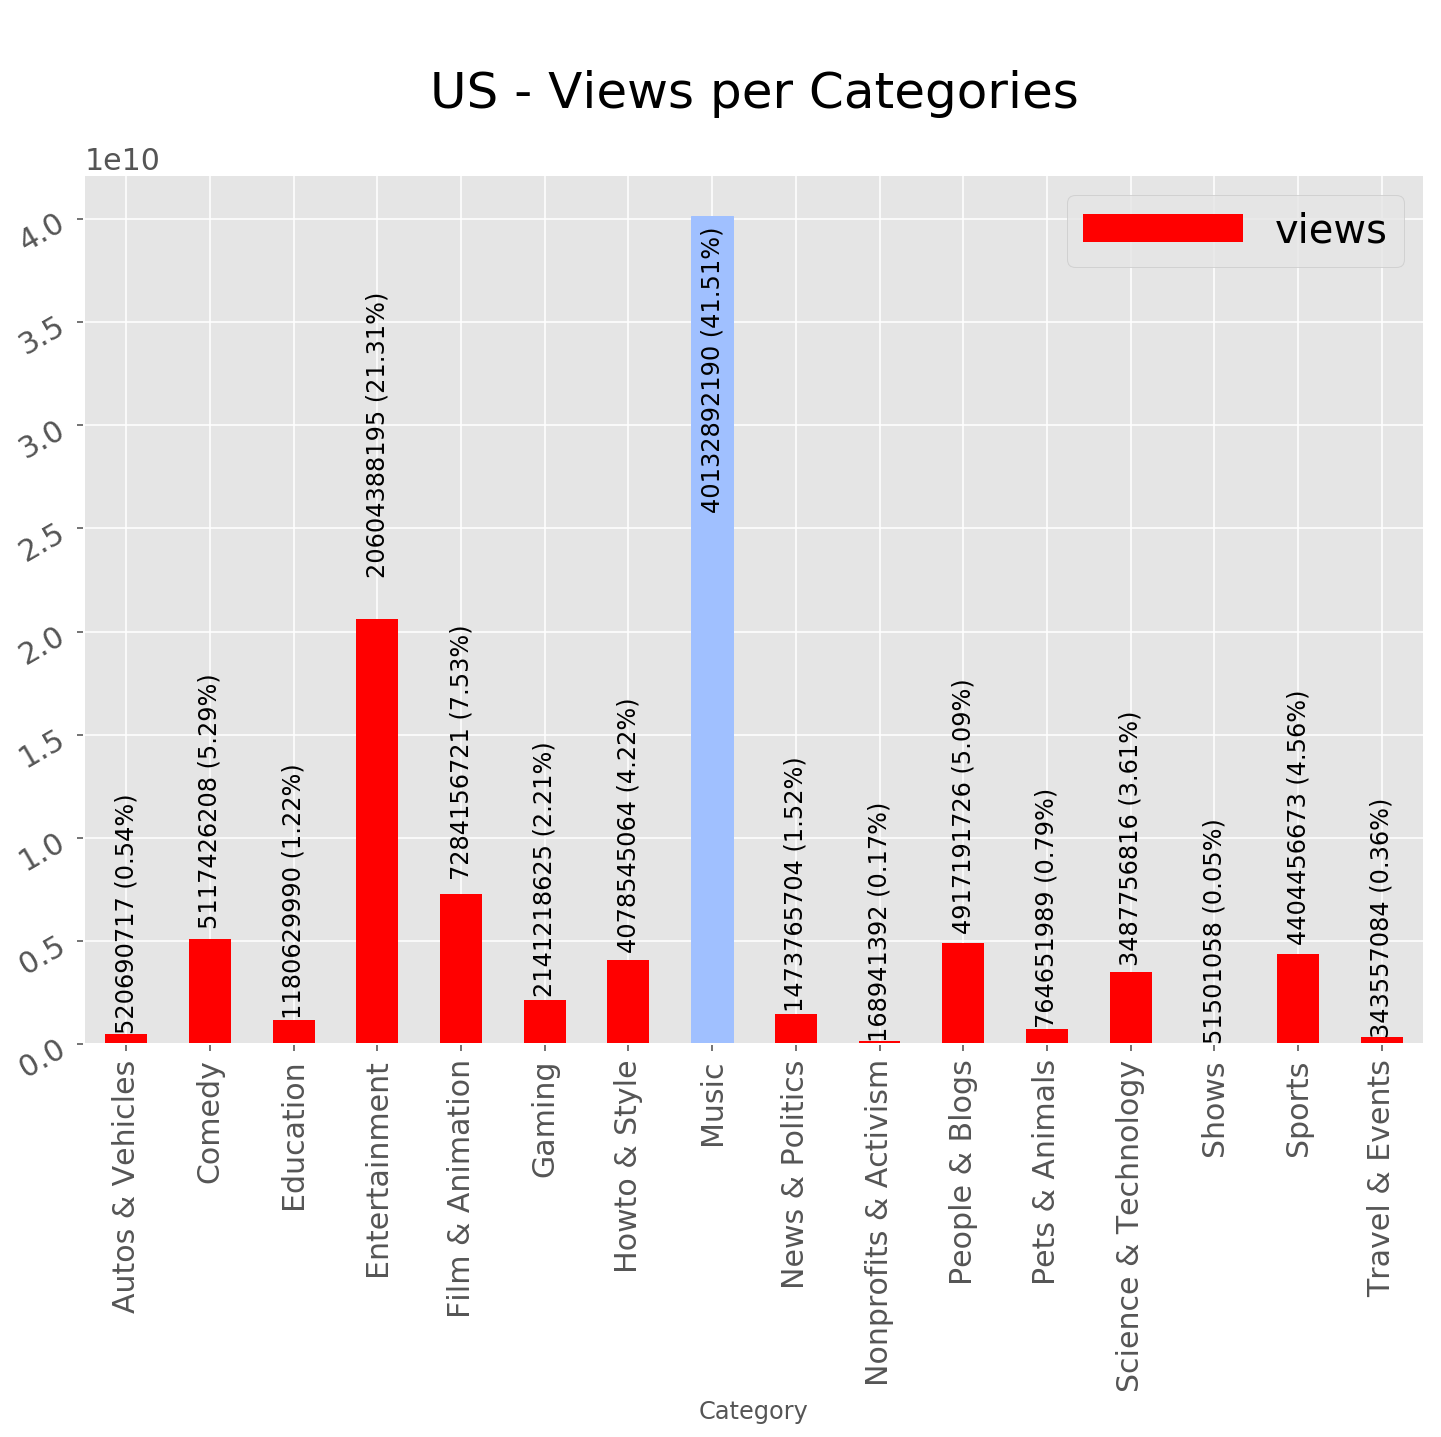

In [26]:
title = "\nUS - Views per Categories\n"
get_relation2(list, title)

In [27]:
import re
df_TagsCateg = pd.DataFrame(df[["Category","tags","views"]])
df_TagsCateg = df_TagsCateg.sort_values(["Category","tags"], ascending=[1,1])
d_TagsValues = {}
for cat in l_categories:
    filter = df_TagsCateg[df_TagsCateg["Category"] == cat]
    #Tag Analysis
    lTags = filter["tags"].unique()
    numEle = len(lTags)
    lFinal = []
    # We created a big list with Tags per Category
    for i in range(numEle):
        #print(lTags)
        #print("=================================")
        try:
            lTemp = lTags[i].split("|")
        except IndexError:
            lTemp = []
        numTemp = len(lTemp)
        for j in range(numTemp):
            value = re.sub('"','',lTemp[j])
            lTemp[j] = value
        #print(lTemp)
        # Add elements from lTemp to lFinal, without duplicates
        if numTemp > 0: 
            lFinal.extend([element for element in lTemp if element not in lFinal])
            d_TagsValues[ cat ] = len(lFinal)
    
#if len(lFinal)>0: print(f"category {cat} has {len(lFinal)} tags.")
for cat, countCat in d_TagsValues.items():
    print(f"category {cat} has {countCat} different tags.")

category Autos & Vehicles has 1042 different tags.
category Comedy has 5950 different tags.
category Education has 3502 different tags.
category Entertainment has 17077 different tags.
category Film & Animation has 3646 different tags.
category Gaming has 1396 different tags.
category Howto & Style has 7470 different tags.
category Music has 6734 different tags.
category News & Politics has 4844 different tags.
category Nonprofits & Activism has 164 different tags.
category People & Blogs has 5620 different tags.
category Pets & Animals has 2108 different tags.
category Science & Technology has 4620 different tags.
category Shows has 138 different tags.
category Sports has 4943 different tags.
category Travel & Events has 868 different tags.


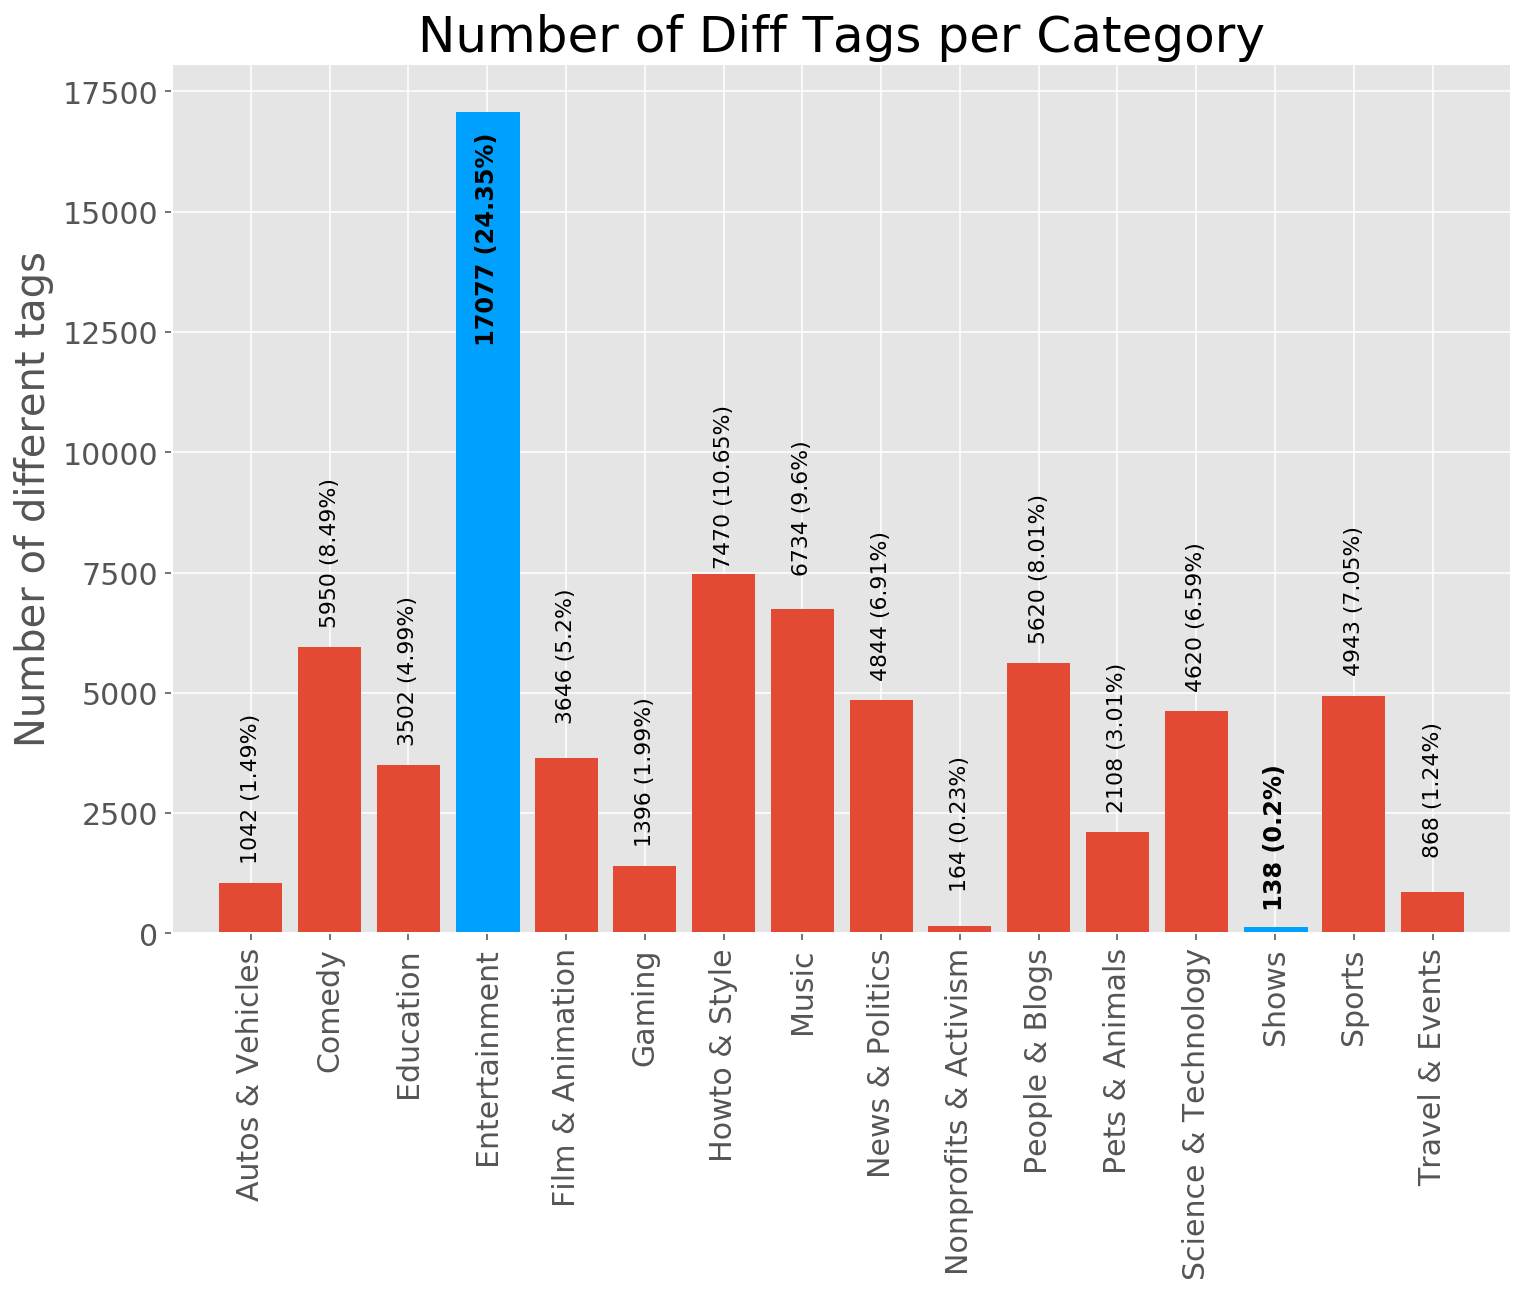

In [29]:
names=[]
values=[]
for item, value in d_TagsValues.items():
    names.append(item)
    values.append(value)

style = dict(size=11, color='black', rotation=90)
maxStyle = dict(size=12, color='black', fontweight='bold', rotation=90)
minStyle = dict(size=12, color='black', fontweight='bold', rotation=90)
    
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

ax = plt.axes()
ax.set_ylabel('Number of different tags', fontsize=20)
ax.set_title('Number of Diff Tags per Category', fontsize=25)
ax.set_ylim([0,max(values)+1000])
ax.set_xlim([-1,16])
barlist = plt.bar(np.arange(len(values)),values,tick_label=names)

plt.xticks(range(0,len(values)),names, rotation=90, ) 
for i in range(len(values)):
    strVal = f"{values[i]} ({round(values[i]*100/ sum(values),2)}%)"
    if max(values) == values[i]:
        ax.text(i, values[i] - 800, strVal, ha='center', **maxStyle)
        barlist[i].set_color("#00A0ff")
    elif min(values) == values[i]:
        ax.text(i, values[i] + 3000, strVal, ha='center', **minStyle)
        barlist[i].set_color("#00A0ff")
    else:
        ax.text(i, values[i] + 3200, strVal, ha='center', **style)    


plt.show() 